In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import functools

In [3]:
evolucion_cm21 = "../../../datos/CM21/evolucion_cm21.csv"
evolucion_cm21 = pd.read_csv(evolucion_cm21)
evolucion_cm21.describe()

,anyo_,mes_,valor,valorPrev,ultima_fecha
count,6185.000000,6185.000000,6005.000000,5515.000000,6185.0
mean,2016.070331,5.542441,818.250450,851.227895,202105.0
std,2.884540,3.326875,1805.286688,1878.049316,0.0
min,2011.000000,1.000000,0.000000,0.000000,202105.0
25%,2014.000000,3.000000,39.000000,39.000000,202105.0
50%,2016.000000,5.000000,207.000000,211.000000,202105.0
75%,2019.000000,8.000000,797.000000,817.500000,202105.0
max,2021.000000,12.000000,15177.000000,15177.000000,202105.0


In [4]:
evolucion_cm21
evolucion_cm21['origen'].fillna('Nan')

0       Residentes en España
1       Residentes en España
2       Residentes en España
3       Residentes en España
4       Residentes en España
                ...         
6180                     Nan
6181                     Nan
6182                     Nan
6183                     Nan
6184                     Nan
Name: origen, Length: 6185, dtype: object

# datros establecimientos por islas


In [5]:
evolucion_cm21.groupby(['lugar', 'indicador']).size()

lugar                 indicador        
Isla De Gran Canaria  Establecimientos     137
                      Estancia media       137
                      Ocupación            137
                      Pernoctaciones       276
                      Personal empleado    137
                      Plazas               137
                      Viajeros             276
Isla De Hierro        Establecimientos     137
                      Estancia media       137
                      Ocupación            137
                      Pernoctaciones       276
                      Personal empleado    137
                      Plazas               137
                      Viajeros             276
Isla De La Gomera     Establecimientos     137
                      Estancia media       137
                      Ocupación            137
                      Pernoctaciones       276
                      Personal empleado    137
                      Plazas               137
                    

In [6]:
evolucion_cm21.nlargest(30, 'valor')

,lugar,origen,anyo_,mes_,valor,valorPrev,indicador,dimension,ultima_fecha
1870,Isla De Tenerife,Residentes en el extranjero,2016,2,15177.0,14099.0,Pernoctaciones,Zonas turísticas,202105
1843,Isla De Tenerife,Residentes en el extranjero,2018,1,15129.0,14894.0,Pernoctaciones,Zonas turísticas,202105
1868,Isla De Tenerife,Residentes en el extranjero,2016,3,15104.0,8176.0,Pernoctaciones,Zonas turísticas,202105
1869,Isla De Tenerife,Residentes en el extranjero,2016,3,15104.0,13311.0,Pernoctaciones,Zonas turísticas,202105
1854,Isla De Tenerife,Residentes en el extranjero,2017,3,14973.0,8751.0,Pernoctaciones,Zonas turísticas,202105
1855,Isla De Tenerife,Residentes en el extranjero,2017,3,14973.0,15104.0,Pernoctaciones,Zonas turísticas,202105
1857,Isla De Tenerife,Residentes en el extranjero,2017,1,14894.0,12585.0,Pernoctaciones,Zonas turísticas,202105
1826,Isla De Tenerife,Residentes en el extranjero,2019,3,14510.0,9409.0,Pernoctaciones,Zonas turísticas,202105
1827,Isla De Tenerife,Residentes en el extranjero,2019,3,14510.0,14419.0,Pernoctaciones,Zonas turísticas,202105
1856,Isla De Tenerife,Residentes en el extranjero,2017,2,14479.0,15177.0,Pernoctaciones,Zonas turísticas,202105


## pernotaciones y viajeros

In [7]:
evolucion_cm21.groupby(['mes_','origen','indicador'])['valor'].mean()

mes_  origen                       indicador     
1     Residentes en España         Pernoctaciones     957.440000
                                   Viajeros           288.860000
      Residentes en el extranjero  Pernoctaciones    5342.600000
                                   Viajeros           887.540000
2     Residentes en España         Pernoctaciones     935.960000
                                   Viajeros           300.560000
      Residentes en el extranjero  Pernoctaciones    5633.620000
                                   Viajeros           969.540000
3     Residentes en España         Pernoctaciones    1107.394444
                                   Viajeros           345.272222
      Residentes en el extranjero  Pernoctaciones    4748.427778
                                   Viajeros           789.400000
4     Residentes en España         Pernoctaciones    1138.711111
                                   Viajeros           350.422222
      Residentes en el extranjero  Perno

In [8]:
maestro_cm21 = "../../../datos/CM21/maestro_cm21.csv"
maestro_cm21 = pd.read_csv(maestro_cm21)
maestro_cm21.describe()

,anyo,mes,valor,valorPrev,ultima_fecha
count,6185.000000,6185.000000,6005.000000,5515.000000,6185.0
mean,2016.070331,5.542441,818.250450,851.227895,202105.0
std,2.884540,3.326875,1805.286688,1878.049316,0.0
min,2011.000000,1.000000,0.000000,0.000000,202105.0
25%,2014.000000,3.000000,39.000000,39.000000,202105.0
50%,2016.000000,5.000000,207.000000,211.000000,202105.0
75%,2019.000000,8.000000,797.000000,817.500000,202105.0
max,2021.000000,12.000000,15177.000000,15177.000000,202105.0


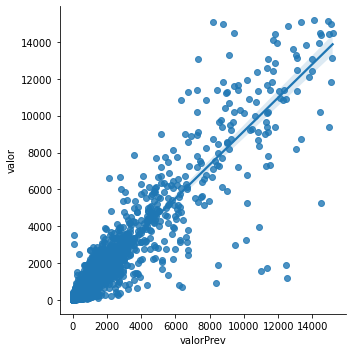

In [13]:
sns.lmplot(x="valorPrev", y="valor", data=maestro_cm21)


In [10]:
maestro_cm21.head()

,lugar,origen,anyo,mes,valor,valorPrev,indicador,dimension,ultima_fecha
0,Isla De Gran Canaria,Residentes en España,2021,5,699.0,NaN,Viajeros,Zonas turísticas,202105
1,Isla De Gran Canaria,Residentes en España,2021,4,785.0,NaN,Viajeros,Zonas turísticas,202105
2,Isla De Gran Canaria,Residentes en España,2021,3,669.0,NaN,Viajeros,Zonas turísticas,202105
3,Isla De Gran Canaria,Residentes en España,2021,3,669.0,122.0,Viajeros,Zonas turísticas,202105
4,Isla De Gran Canaria,Residentes en España,2021,3,635.0,NaN,Viajeros,Zonas turísticas,202105


In [11]:
maestro_cm21.isna()
maestro_cm21['origen'].fillna('nan')

0       Residentes en España
1       Residentes en España
2       Residentes en España
3       Residentes en España
4       Residentes en España
                ...         
6180                     nan
6181                     nan
6182                     nan
6183                     nan
6184                     nan
Name: origen, Length: 6185, dtype: object

In [12]:
maestro_cm21.groupby(['mes','origen','indicador'])['valor'].mean()

mes  origen                       indicador     
1    Residentes en España         Pernoctaciones     957.440000
                                  Viajeros           288.860000
     Residentes en el extranjero  Pernoctaciones    5342.600000
                                  Viajeros           887.540000
2    Residentes en España         Pernoctaciones     935.960000
                                  Viajeros           300.560000
     Residentes en el extranjero  Pernoctaciones    5633.620000
                                  Viajeros           969.540000
3    Residentes en España         Pernoctaciones    1107.394444
                                  Viajeros           345.272222
     Residentes en el extranjero  Pernoctaciones    4748.427778
                                  Viajeros           789.400000
4    Residentes en España         Pernoctaciones    1138.711111
                                  Viajeros           350.422222
     Residentes en el extranjero  Pernoctaciones    228